In [ ]:
!pip install riskfolio-lib alphalens yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.2/295.2 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 982.9/982.9 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 8.2 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Created wheel for alphalens: filename=alphalens-0.4.0-py3-none-any.whl size=24027545 sha256=c4f097726d7241002ae5736c06f755ba37ba24dd2168bda4f8f21c32ceff90e3
  Stored in directory: /root/.cache/pip/wheels/4b/58/a6/6536c00c2d092cab6164cfa

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import riskfolio as rp
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Assets/sp500_stocks.csv')
df.head()

Date Symbol  Adj Close      Close       High        Low       Open  \
0  2010-01-04    MMM  44.254017  69.414719  69.774246  69.122070  69.473244   
1  2010-01-05    MMM  43.976837  68.979935  69.590302  68.311035  69.230766   
2  2010-01-06    MMM  44.600502  69.958191  70.735786  69.824417  70.133781   
3  2010-01-07    MMM  44.632484  70.008362  70.033447  68.662209  69.665550   
4  2010-01-08    MMM  44.946964  70.501671  70.501671  69.648827  69.974915   

      Volume  
0  3640265.0  
1  3405012.0  
2  6301126.0  
3  5346240.0  
4  4073337.0

In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852046 entries, 0 to 1852045
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date       object 
 1   Symbol     object 
 2   Adj Close  float64
 3   Close      float64
 4   High       float64
 5   Low        float64
 6   Open       float64
 7   Volume     float64
dtypes: float64(6), object(2)
memory usage: 113.0+ MB
None
          Adj Close         Close          High           Low          Open  \
count  1.757167e+06  1.757167e+06  1.757167e+06  1.757167e+06  1.757167e+06   
mean   9.618659e+01  1.037039e+02  1.048399e+02  1.025118e+02  1.036839e+02   
std    2.054719e+02  2.056383e+02  2.080360e+02  2.031662e+02  2.055534e+02   
min    2.036244e-01  2.220000e-01  2.262500e-01  2.162500e-01  2.180000e-01   
25%    2.890313e+01  3.485000e+01  3.523000e+01  3.445000e+01  3.485000e+01   
50%    5.341603e+01  6.228000e+01  6.291000e+01  6.160000e+01  6.226000e+01   
75%    1.024300e+02  1.126400e+02  1

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [ ]:
tickers=list(df['Symbol'].unique())
len(tickers)

503

In [ ]:
# Function to get company metadata for each ticker
def get_company_metadata(tickers):
    data = []
    for ticker in tickers:
        try:
            stock = yf.Ticker(ticker)
            info = stock.info
            # Collect relevant company info
            data.append({
                'Ticker': ticker,
                'Company Name': info.get('longName', 'N/A'),
                'Sector': info.get('sector', 'N/A'),
                'Industry': info.get('industry', 'N/A'),
                'Country': info.get('country', 'N/A'),
                'Market Cap': info.get('marketCap', 'N/A'),
                'Employees': info.get('fullTimeEmployees', 'N/A'),
                'Website': info.get('website', 'N/A')
            })
        except Exception as e:
            print(f"Error retrieving data for {ticker}: {e}")

    # Convert list of dictionaries into a DataFrame for display
    return pd.DataFrame(data)

# Retrieve metadata for the tickers list
metadata_df = get_company_metadata(tickers)

# Display the DataFrame in the notebook
metadata_df


Ticker                    Company Name             Sector  \
0      MMM                      3M Company        Industrials   
1      AOS         A. O. Smith Corporation        Industrials   
2      ABT             Abbott Laboratories         Healthcare   
3     ABBV                     AbbVie Inc.         Healthcare   
4      ACN                   Accenture plc         Technology   
..     ...                             ...                ...   
498    XYL                      Xylem Inc.        Industrials   
499    YUM               Yum! Brands, Inc.  Consumer Cyclical   
500   ZBRA  Zebra Technologies Corporation         Technology   
501    ZBH    Zimmer Biomet Holdings, Inc.         Healthcare   
502    ZTS                     Zoetis Inc.         Healthcare   

                                     Industry        Country    Market Cap  \
0                               Conglomerates  United States   75426299904   
1              Specialty Industrial Machinery  United States   13212097536   
2                             Medical Devices  United States  195616964608   
3                Drug Manufacturers - General  United States  344065343488   
4             Information Technology Services        Ireland  218912210944   
..                                        ...            ...           ...   
498            Specialty Industrial Machinery  United States   32671535104   
499                               Restaurants  United States   39340605440   
500                   Communication Equipment  United States   19012536320   
501                           Medical Devices  United States   22039220224   
502  Drug Manufacturers - Specialty & Generic  United States   88258863104   

    Employees                       Website  
0       85000            https://www.3m.com  
1       12000       https://www.aosmith.com  
2      114000        https://www.abbott.com  
3       50000        https://www.abbvie.com  
4      774000     https://www.accenture.com  
..        ...                           ...  
498     23000         https://www.xylem.com  
499     35000           https://www.yum.com  
500      9750         https://www.zebra.com  
501     18000  https://www.zimmerbiomet.com  
502     14100        https://www.zoetis.com  

[503 rows x 8 columns]

In [ ]:
metadata_df['Market Cap'] = pd.to_numeric(metadata_df['Market Cap'], errors='coerce')
metadata_df['Employees'] = pd.to_numeric(metadata_df['Employees'], errors='coerce')


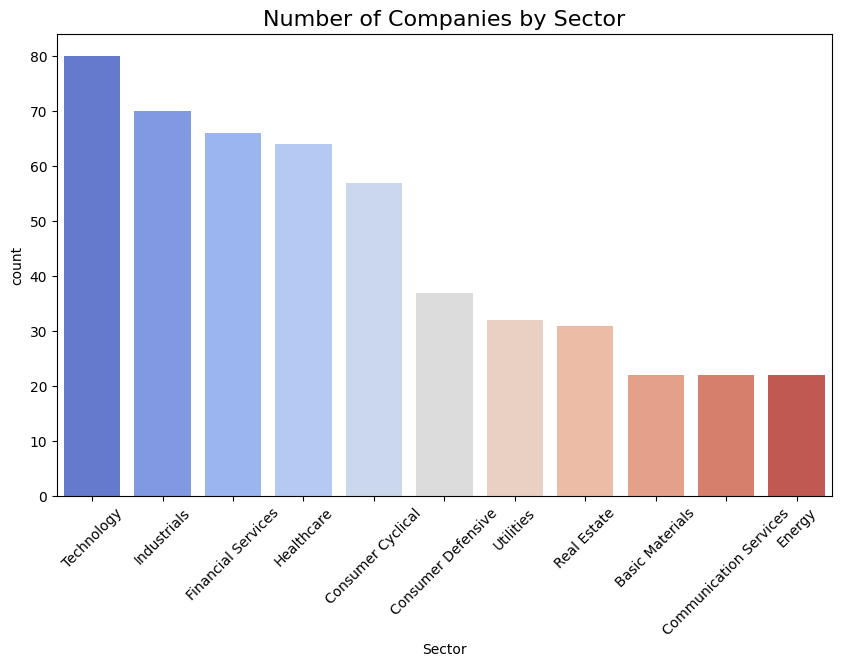

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=metadata_df, x='Sector', palette='coolwarm', order=metadata_df['Sector'].value_counts().index)
plt.title('Number of Companies by Sector', fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [ ]:
fig = px.bar(metadata_df,
             x='Company Name',
             y='Market Cap',
             color='Sector',
             hover_data=['Industry', 'Employees', 'Country', 'Website'],
             title='Market Capitalization by Company',
             height=600)

fig.update_layout(xaxis_tickangle=-45, xaxis_title="Company", yaxis_title="Market Cap")
fig.show()

In [ ]:
fig = px.scatter(metadata_df,
                 x='Employees',
                 y='Market Cap',
                 color='Sector',
                 size='Market Cap',
                 hover_name='Company Name',
                 title='Market Cap vs Number of Employees',
                 height=600)

fig.update_layout(xaxis_title="Employees", yaxis_title="Market Cap")
fig.show()

In [ ]:
fig = px.pie(metadata_df,
             names='Sector',
             title='Distribution of Companies by Sector',
             hole=0.3,  # Donut chart
             hover_data=['Company Name', 'Industry'])

fig.show()

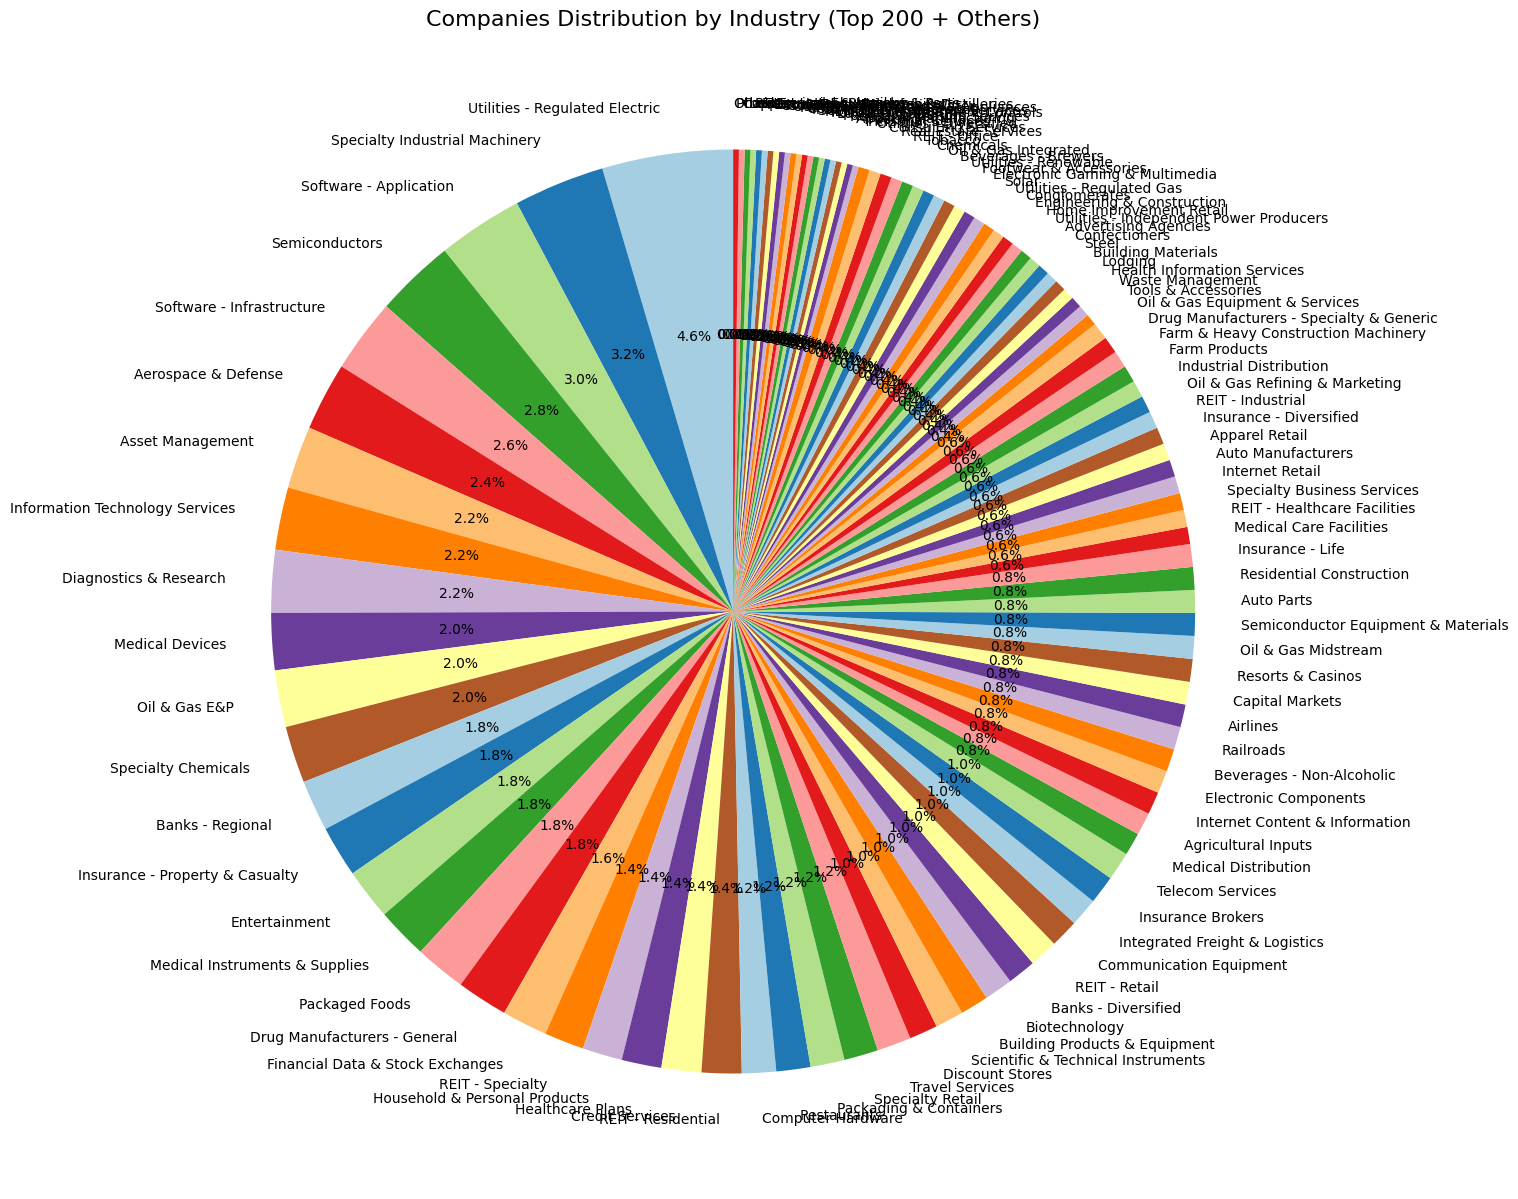

In [ ]:
industry_distribution = metadata_df['Industry'].value_counts()

top_200 = industry_distribution[:200]
others_count = industry_distribution[200:].sum()
top_200['Others'] = others_count

plt.figure(figsize=(15, 15))

plt.pie(
    top_200,
    labels=top_200.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('Paired')
)

plt.title('Companies Distribution by Industry (Top 200 + Others)', fontsize=16)
plt.show()


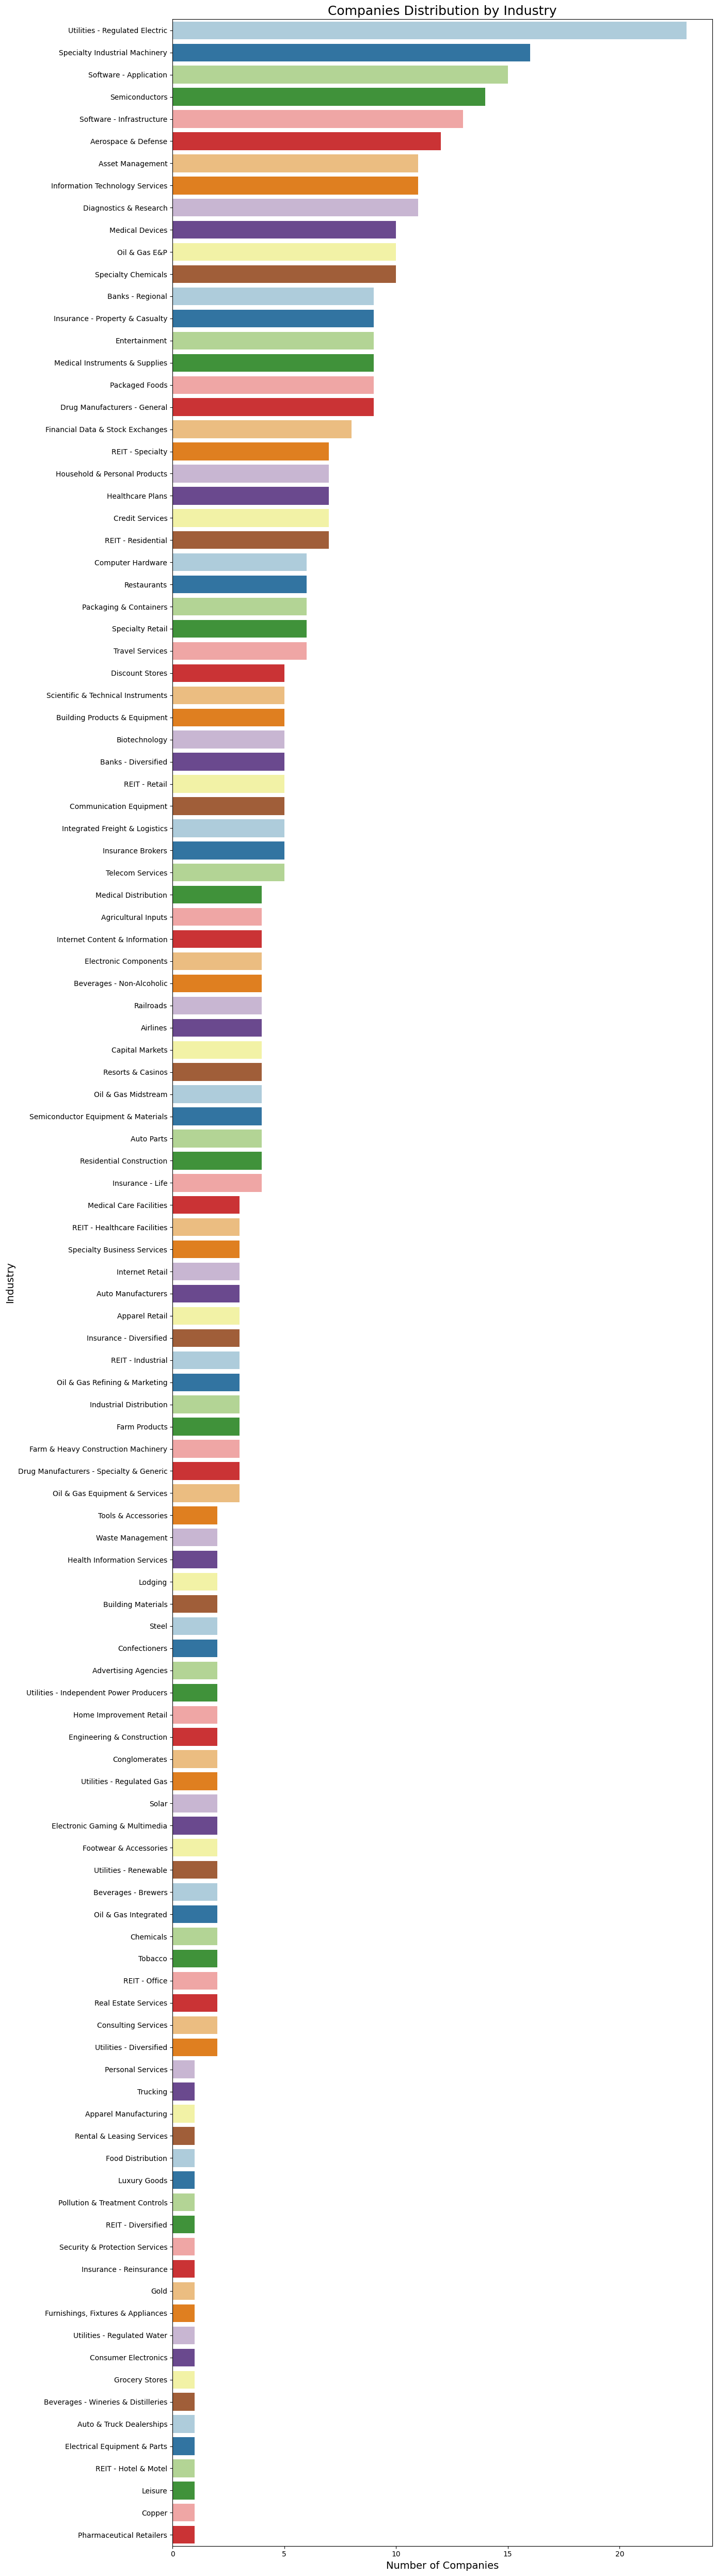

In [ ]:
industry_distribution = metadata_df['Industry'].value_counts()

plt.figure(figsize=(14, 50))  # Increased size for better readability

sns.barplot(
    x=industry_distribution.values,  # The count values
    y=industry_distribution.index,   # Industry names as labels on the y-axis
    palette='Paired'  # Use the 'Paired' color palette from Seaborn
)

plt.title('Companies Distribution by Industry', fontsize=18)
plt.xlabel('Number of Companies', fontsize=14)
plt.ylabel('Industry', fontsize=14)

plt.yticks(fontsize=10)  # Reduce the font size of industry labels

plt.tight_layout()
plt.show()


In [ ]:
fig = px.treemap(metadata_df,
                 path=['Sector', 'Industry', 'Company Name'],
                 values='Market Cap',
                 title='Market Capitalization Treemap by Sector and Industry',
                 hover_data=['Employees', 'Country'],
                 color='Market Cap',
                 color_continuous_scale='RdBu')

fig.show()

In [ ]:
fig = px.sunburst(metadata_df,
                  path=['Sector', 'Industry', 'Company Name'],
                  values='Market Cap',
                  title='Sunburst Chart: Market Cap by Sector and Industry',
                  hover_data=['Employees', 'Country'],
                  color='Market Cap',
                  color_continuous_scale='Blues')

fig.update_layout(
    width=1000,
    height=800,
    title_x=0.5
)

fig.show()

In [ ]:
fig = px.bar(metadata_df, x='Sector', y='Market Cap', color='Sector', hover_data=['Company Name', 'Employees'], title='Market Capitalization by Sector', height=600)
fig.show()


In [ ]:
fig = px.scatter(metadata_df, x='Employees', y='Market Cap', color='Sector', size='Market Cap', hover_name='Company Name', title='Market Cap vs Employees per Sector', height=600)
fig.show()

In [ ]:
stocks = yf.Tickers(tickers)
stocks

yfinance.Tickers object <MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,APD,ABNB,AKAM,ALB,ARE,ALGN,ALLE,LNT,ALL,GOOGL,GOOG,MO,AMZN,AMCR,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,AME,AMGN,APH,ADI,ANSS,AON,APA,AAPL,AMAT,APTV,ACGL,ADM,ANET,AJG,AIZ,T,ATO,ADSK,ADP,AZO,AVB,AVY,AXON,BKR,BALL,BAC,BK,BBWI,BAX,BDX,BRK-B,BBY,BIO,TECH,BIIB,BLK,BX,BA,BKNG,BWA,BSX,BMY,AVGO,BR,BRO,BF-B,BLDR,BG,BXP,CDNS,CZR,CPT,CPB,COF,CAH,KMX,CCL,CARR,CTLT,CAT,CBOE,CBRE,CDW,CE,COR,CNC,CNP,CF,CHRW,CRL,SCHW,CHTR,CVX,CMG,CB,CHD,CI,CINF,CTAS,CSCO,C,CFG,CLX,CME,CMS,KO,CTSH,CL,CMCSA,CAG,COP,ED,STZ,CEG,COO,CPRT,GLW,CPAY,CTVA,CSGP,COST,CTRA,CRWD,CCI,CSX,CMI,CVS,DHR,DRI,DVA,DAY,DECK,DE,DAL,DVN,DXCM,FANG,DLR,DFS,DG,DLTR,D,DPZ,DOV,DOW,DHI,DTE,DUK,DD,EMN,ETN,EBAY,ECL,EIX,EW,EA,ELV,EMR,ENPH,ETR,EOG,EPAM,EQT,EFX,EQIX,EQR,ESS,EL,ETSY,EG,EVRG,ES,EXC,EXPE,EXPD,EXR,XOM,FFIV,FDS,FICO,FAST,FRT,FDX,FIS,FITB,FSLR,FE,FI,FMC,F,FTNT,FTV,FOXA,FOX,BEN,FCX,GRMN,IT,GE,GEHC,GEV,GEN,GNRC,GD,GIS,GM,GPC,GILD,GPN,GL,GDDY,GS,HAL,HIG,HAS,HCA,DOC,HSIC,HSY,HES,HPE,HLT,HO

In [ ]:
market_caps = {ticker: stocks.tickers[ticker].info['marketCap'] for ticker in tickers}
market_caps

{'MMM': 75426299904,
 'AOS': 13212097536,
 'ABT': 195616964608,
 'ABBV': 344065343488,
 'ACN': 218912210944,
 'ADBE': 226914287616,
 'AMD': 265997205504,
 'AES': 14268244992,
 'AFL': 61933273088,
 'A': 42541780992,
 'APD': 66774228992,
 'ABNB': 81108246528,
 'AKAM': 15390495744,
 'ALB': 11289044992,
 'ARE': 21169543168,
 'ALGN': 19033569280,
 'ALLE': 12526406656,
 'LNT': 15579810816,
 'ALL': 49734762496,
 'GOOGL': 2025700589568,
 'GOOG': 2025711599616,
 'MO': 87102529536,
 'AMZN': 1972857864192,
 'AMCR': 16404610048,
 'AEE': 23077001216,
 'AAL': 7591498752,
 'AEP': 54191099904,
 'AXP': 192699809792,
 'AIG': 47227363328,
 'AMT': 107578327040,
 'AWK': 28241494016,
 'AMP': 46013190144,
 'AME': 39840399360,
 'AMGN': 173379960832,
 'APH': 78302937088,
 'ADI': 115211198464,
 'ANSS': 28413753344,
 'AON': 75528527872,
 'APA': 9073769472,
 'AAPL': 3463341932544,
 'AMAT': 168936865792,
 'APTV': 17443430400,
 'ACGL': 42648735744,
 'ADM': 28688521216,
 'ANET': 119459823616,
 'AJG': 61227499520,
 '

In [ ]:
market_caps_df = pd.DataFrame(list(market_caps.items()), columns=['Ticker', 'Market Cap'])
market_caps_df

Ticker    Market Cap
0      MMM   75426299904
1      AOS   13212097536
2      ABT  195616964608
3     ABBV  344065343488
4      ACN  218912210944
..     ...           ...
498    XYL   32671535104
499    YUM   39340605440
500   ZBRA   19012536320
501    ZBH   22039220224
502    ZTS   88258863104

[503 rows x 2 columns]

In [ ]:
market_weights = market_caps_df['Market Cap'] / market_caps_df['Market Cap'].sum()
market_weights

0      0.001415
1      0.000248
2      0.003669
3      0.006454
4      0.004106
         ...   
498    0.000613
499    0.000738
500    0.000357
501    0.000413
502    0.001656
Name: Market Cap, Length: 503, dtype: float64

In [ ]:
assets = df[['Date', 'Symbol', 'Adj Close']]
assets.head()


Date Symbol  Adj Close
0  2010-01-04    MMM  44.254017
1  2010-01-05    MMM  43.976837
2  2010-01-06    MMM  44.600502
3  2010-01-07    MMM  44.632484
4  2010-01-08    MMM  44.946964

In [ ]:
assets.set_index('Date', inplace=True)
assets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852046 entries, 2010-01-04 to 2024-08-20
Data columns (total 2 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Symbol     object 
 1   Adj Close  float64
dtypes: float64(1), object(1)
memory usage: 42.4+ MB


In [ ]:
assets_return = assets[['Symbol', 'Adj Close']].copy()
assets_return['Return'] = assets_return['Adj Close'].pct_change()

assets_return = assets_return.dropna()
assets_return.head()

Symbol  Adj Close    Return
Date                                  
2010-01-05    MMM  43.976837 -0.006263
2010-01-06    MMM  44.600502  0.014182
2010-01-07    MMM  44.632484  0.000717
2010-01-08    MMM  44.946964  0.007046
2010-01-11    MMM  44.765736 -0.004032

In [ ]:
returns= assets_return.reset_index().pivot(index='Date', columns='Symbol', values='Return')
print(returns.head())

Symbol             A       AAL      AAPL      ABBV      ABNB       ABT  \
Date                                                                     
2010-01-04 -0.808350 -0.945307 -0.772167 -0.517775 -0.804637 -0.766681   
2010-01-05 -0.010863  0.113207  0.001729  0.000000  0.000000 -0.008079   
2010-01-06 -0.003553 -0.041431 -0.015906  0.000000  0.000000  0.005553   
2010-01-07 -0.001296  0.029469 -0.001849  0.000000  0.000000  0.008284   
2010-01-08 -0.000325 -0.019084  0.006648  0.000000  0.000000  0.005112   

Symbol          ACGL       ACN      ADBE       ADI  ...       WTW        WY  \
Date                                                ...                       
2010-01-04 -0.885548 -0.836494 -0.887732 -0.646462  ...  0.189245 -0.847271   
2010-01-05 -0.003336  0.006180  0.016446 -0.001579  ... -0.002242  0.021229   
2010-01-06 -0.004323  0.010631 -0.002122 -0.001898  ...  0.016099 -0.011057   
2010-01-07 -0.005882 -0.000935 -0.019405 -0.007921  ... -0.002947 -0.004473   
2010-01

In [ ]:
returns.fillna(returns.mean(), inplace=True)

In [ ]:
returns.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
returns.sample(10)

Symbol             A       AAL      AAPL      ABBV      ABNB       ABT  \
Date                                                                     
2020-09-11  0.000304 -0.004612 -0.013129  0.000558  0.000000  0.006731   
2018-09-26 -0.000711  0.005636 -0.007966  0.004265  0.000000  0.008864   
2012-08-20 -0.014509  0.050595  0.026292  0.000000  0.000000 -0.002883   
2024-08-05 -0.031214 -0.036345 -0.048167 -0.026045 -0.022772 -0.024077   
2015-04-22 -0.004197  0.000779  0.013474  0.014306  0.000000  0.026104   
2021-03-05  0.010001 -0.037194  0.010738  0.009938 -0.002330  0.010689   
2015-10-07  0.018338  0.030947 -0.004761  0.009985  0.000000  0.018551   
2020-03-24  0.057283  0.358049  0.100326  0.046357  0.000000  0.109360   
2012-03-12 -0.020875 -0.019915  0.012528  0.000000  0.000000  0.004832   
2019-07-18  0.007760  0.014432  0.011360 -0.001025  0.000000  0.023321   

Symbol          ACGL       ACN      ADBE       ADI  ...       WTW        WY  \
Date                                                ...                       
2020-09-11 -0.013800  0.004794 -0.010310 -0.004113  ... -0.005548 -0.004203   
2018-09-26 -0.004047  0.000868  0.002352 -0.002593  ... -0.013161  0.000612   
2012-08-20  0.000503 -0.004748  0.003550 -0.006860  ... -0.004052 -0.008663   
2024-08-05 -0.026452 -0.029120 -0.032024 -0.035584  ... -0.030669 -0.019219   
2015-04-22 -0.003739  0.004086  0.011793  0.001864  ... -0.003677  0.004429   
2021-03-05  0.018767  0.010162  0.004031  0.030169  ...  0.027348  0.028954   
2015-10-07  0.018389  0.011035 -0.052848  0.017226  ...  0.000949  0.011498   
2020-03-24  0.100602  0.091586  0.008885  0.100634  ...  0.151057  0.253155   
2012-03-12 -0.007493  0.004765 -0.002378 -0.006429  ... -0.002276 -0.003724   
2019-07-18  0.003148  0.005211  0.002230  0.018167  ...  0.013690 -0.007905   

Symbol          WYNN       XEL       XOM       XYL       YUM       ZBH  \
Date                                                                     
2020-09-11 -0.014641 -0.003905 -0.002702  0.030846 -0.000866  0.003894   
2018-09-26 -0.016948 -0.011585 -0.008324  0.000000  0.000000 -0.003678   
2012-08-20  0.007634 -0.000351 -0.005090  0.005966 -0.013918  0.009204   
2024-08-05 -0.042318 -0.029456 -0.018053 -0.030811 -0.013759 -0.030083   
2015-04-22  0.018143  0.000875  0.006676  0.002828  0.039456  0.001022   
2021-03-05  0.003236  0.041242  0.037813  0.017665  0.007338  0.014400   
2015-10-07  0.061017 -0.000285  0.016819  0.019467 -0.188324  0.009576   
2020-03-24  0.156158  0.081000  0.126868  0.094633  0.232484  0.155798   
2012-03-12  0.002318  0.013114  0.014828  0.010275 -0.007120 -0.001625   
2019-07-18 -0.005887  0.010607 -0.008479 -0.010332  0.011542  0.008617   

Symbol          ZBRA       ZTS  
Date                            
2020-09-11  0.002085  0.003099  
2018-09-26 -0.004089  0.001108  
2012-08-20  0.001623  0.000000  
2024-08-05 -0.013776 -0.031951  
2015-04-22  0.001238 -0.010728  
2021-03-05 -0.003107  0.011667  
2015-10-07  0.011390  0.030926  
2020-03-24  0.057580  0.119793  
2012-03-12  0.016268  0.000000  
2019-07-18 -0.076670  0.012545  

[10 rows x 503 columns]

In [ ]:
print("Number of NaNs:", returns.isnull().sum().sum())  # Total NaNs in the DataFrame
print("Number of Infs:", np.isinf(returns.values).sum())  # Total Infs in the DataFrame


Number of NaNs: 0
Number of Infs: 0


In [ ]:
print(returns.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3682 entries, 2010-01-04 to 2024-08-20
Columns: 503 entries, A to ZTS
dtypes: float64(503)
memory usage: 14.2+ MB
None


**Black-Litterman Model**


---


`The Black-Litterman model is a sophisticated approach to portfolio optimization that integrates market equilibrium with subjective investor views. Developed by Fischer Black and Robert Litterman, it addresses the instability and sensitivity of traditional mean-variance optimization by blending market consensus with specific forecasts.`



In [ ]:
# view dictionary
viewdict = {
    'AAPL': 0.10,
    'MSFT': 0.10,
    'META': 0.05,
    'AMZN': 0.30,
    'XOM': 0.02,
    'UNH': 0.01,
    'JNJ': 0.15,
    'V': 0.09,
    'HD': 0.16,
    'ABBV': 0.07,
    'KO': 0.01,
    'DIS': -0.23,
    'T': 0.16,
    'UPS': 0.10,
    'LMT': -0.09,
    'CAT': 0.30,
    'F': 0.16,
    'MAR': -0.08,
    'O': 0.30,
    'HSY': -0.26
}


In [ ]:
port = rp.Portfolio(returns=returns)
port.market_caps = market_weights  #market caps as an attribute

In [ ]:
method_mu = 'hist'  # historical data for expected returns
method_cov = 'hist'  # historical data for covariance matrix

In [ ]:
#covariance matrix
port.assets_stats(method_mu=method_mu, method_cov=method_cov)

In [ ]:
# Black-Litterman parameters
market_returns = port.mu  # Equilibrium returns from market data
cov_matrix = port.cov  # Covariance matrix from market data

In [ ]:
# P matrix (number of views x number of assets) and Q vector (expected returns)
P = np.zeros((len(viewdict), len(tickers)))  # Views matrix
Q = np.zeros((len(viewdict), 1))             # Views on returns

#P matrix and Q vector based on viewdict
for i, (ticker, view) in enumerate(viewdict.items()):
    if ticker in tickers:
        P[i, tickers.index(ticker)] = 1  # Setting 1 for the asset that we have a view on
        Q[i] = view                      # the view (expected return)

# omega (diagonal matrix of uncertainty in views)
omega = np.diag([0.0001] * len(viewdict))  # Modify based on uncertainty of your views

# Display the P and Q matrices
print("P Matrix:\n", P)
print("Q Vector:\n", Q)

P Matrix:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Q Vector:
 [[ 0.1 ]
 [ 0.1 ]
 [ 0.05]
 [ 0.3 ]
 [ 0.02]
 [ 0.01]
 [ 0.15]
 [ 0.09]
 [ 0.16]
 [ 0.07]
 [ 0.01]
 [-0.23]
 [ 0.16]
 [ 0.1 ]
 [-0.09]
 [ 0.3 ]
 [ 0.16]
 [-0.08]
 [ 0.3 ]
 [-0.26]]


In [ ]:
#Classic Optimization
port.alpha = 0.05
model = 'Classic'  # Classic historical optimization
rm = 'MV'          # Risk measure: variance (mean-variance optimization)
obj = 'Sharpe'     # Objective: maximize Sharpe ratio
hist = True        # Use historical scenarios for risk measures that depend on scenarios
rf = 0             # Risk-free rate
l = 0              # Risk aversion factor

# estimating the portfolio weights using the classic approach
w_classic = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
# Displaying classic optimized portfolio weights
print("Classic Optimized Portfolio Weights:\n", w_classic.T)

Classic Optimized Portfolio Weights:
                     A           AAL          AAPL          ABBV      ABNB  \
weights  2.031648e-11  1.714312e-11  1.714741e-10  1.002998e-10  0.004885   

                  ABT          ACGL           ACN          ADBE           ADI  \
weights  3.531528e-11  9.344956e-11  3.193649e-11  2.837217e-11  2.388449e-11   

         ...           WTW            WY          WYNN           XEL  \
weights  ...  5.053517e-11  1.509060e-11  1.534848e-11  6.207504e-11   

                  XOM           XYL           YUM           ZBH          ZBRA  \
weights  3.064536e-11  2.580815e-11  3.875364e-11  2.058638e-11  2.625134e-11   

                  ZTS  
weights  3.307348e-11  

[1 rows x 503 columns]


In [ ]:
points = 50 # Number of points of the frontier

frontier_classic = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

print(frontier_classic.T.head())

A           AAL          AAPL          ABBV          ABNB  \
0  3.627562e-11  2.370027e-11  5.484166e-11  2.437230e-10  1.651192e-10   
1  1.396837e-12  1.112924e-12  1.414018e-11  1.728320e-11  3.196782e-03   
2  1.227940e-11  1.017286e-11  1.259251e-10  1.050479e-10  5.341977e-03   
3  2.064982e-12  1.738797e-12  1.797178e-11  1.078173e-11  5.013239e-03   
4  3.033234e-12  2.567997e-12  2.121408e-11  1.079003e-11  5.120813e-04   

            ABT          ACGL           ACN          ADBE           ADI  ...  \
0  6.908520e-11  4.413525e-11  4.414129e-11  4.142272e-11  3.841082e-11  ...   
1  2.731713e-12  5.150829e-12  2.261598e-12  2.104662e-12  1.813452e-12  ...   
2  2.324439e-11  5.529548e-11  2.019397e-11  1.801718e-11  1.544422e-11  ...   
3  3.630064e-12  9.639767e-12  3.260908e-12  2.884067e-12  2.443914e-12  ...   
4  4.895179e-12  1.275377e-11  4.561514e-12  4.144845e-12  3.459937e-12  ...   

            WTW            WY          WYNN           XEL           XOM  \
0  1.064285e-10  2.769835e-11  2.782526e-11  7.956820e-11  6.823006e-11   
1  4.413657e-12  1.022686e-12  1.131645e-12  4.496992e-12  2.450380e-12   
2  3.558890e-11  9.115823e-12  9.805612e-12  4.143189e-11  2.066424e-11   
3  5.196414e-12  1.531848e-12  1.562585e-12  6.434546e-12  3.137643e-12   
4  6.711525e-12  2.241945e-12  2.207257e-12  7.902086e-12  4.223706e-12   

            XYL           YUM           ZBH          ZBRA           ZTS  
0  4.844607e-11  5.760509e-11  4.963331e-11  3.202068e-11  6.388586e-11  
1  1.826688e-12  2.995471e-12  1.559842e-12  1.726507e-12  2.516859e-12  
2  1.613205e-11  2.594234e-11  1.344171e-11  1.563981e-11  2.162491e-11  
3  2.639966e-12  3.960686e-12  2.100858e-12  2.676569e-12  3.400916e-12  
4  3.756106e-12  5.287066e-12  2.892609e-12  3.994528e-12  4.543263e-12  

[5 rows x 503 columns]

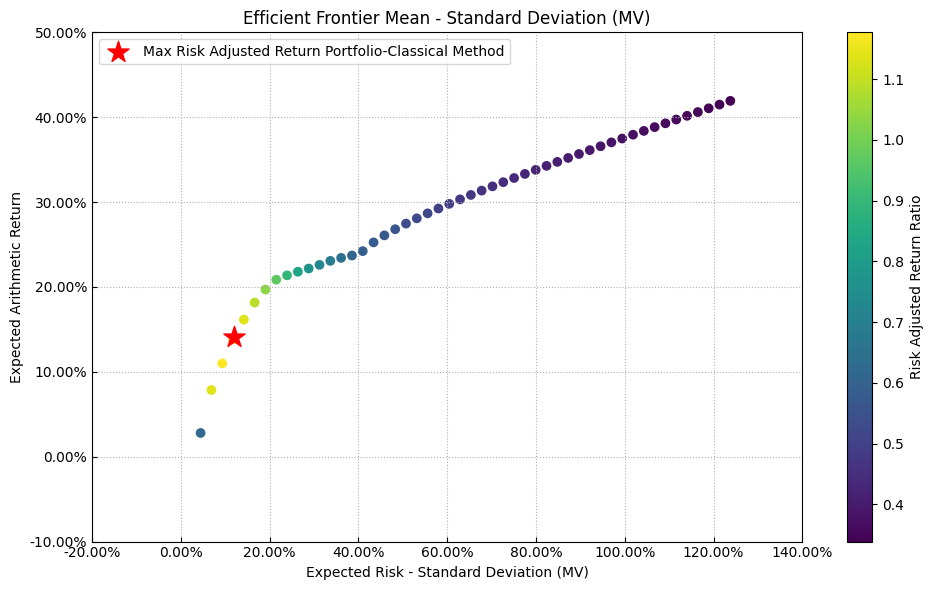

In [ ]:
label = 'Max Risk Adjusted Return Portfolio-Classical Method' # Title of point
mu = port.mu_bl # Expected returns of Black Litterman model
cov = port.cov_bl # Covariance matrix of Black Litterman model
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier_classic, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w_classic, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

In [ ]:
# Estimating Black-Litterman inputs using the classical optimized weights as a prior
port.blacklitterman_stats(P=P, Q=Q/252, rf=rf, w=w_classic, delta=None, eq=True)

# Black-Litterman Optimization
model = 'BL'  # Black-Litterman model
rm = 'MV'     # Risk measure: variance (mean-variance)
obj = 'Sharpe' # Objective: maximize Sharpe ratio
hist = False  # historical scenarios for Black-Litterman

# Estimating optimal portfolio using the Black-Litterman model
w_bl = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

# Displaying Black-Litterman optimized portfolio weights
print("Black-Litterman Optimized Portfolio Weights:\n", w_bl.T)

Black-Litterman Optimized Portfolio Weights:
                     A           AAL          AAPL          ABBV      ABNB  \
weights  1.317644e-11  1.078891e-11  1.420401e-11  5.488177e-11  0.002362   

                  ABT          ACGL           ACN          ADBE           ADI  \
weights  2.343517e-11  2.669702e-11  1.155298e-11  1.331771e-11  8.920314e-12   

         ...           WTW            WY          WYNN           XEL  \
weights  ...  2.220716e-11  1.008117e-11  7.631977e-12  4.525634e-11   

                  XOM           XYL           YUM           ZBH          ZBRA  \
weights  1.275094e-11  1.630108e-11  1.889065e-11  1.671731e-11  8.948248e-12   

                  ZTS  
weights  2.257777e-11  

[1 rows x 503 columns]


In [ ]:
points = 50 # Number of points of the frontier

frontier_bl = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

print(frontier_bl.T.head())

              A           AAL          AAPL          ABBV          ABNB  \
0  4.590426e-11  2.997027e-11  6.938796e-11  3.056957e-10  2.085082e-10   
1  2.273606e-12  1.624886e-12  2.927920e-12  2.081531e-11  4.481157e-04   
2  2.330756e-11  1.704866e-11  2.787062e-11  1.396119e-10  1.848112e-03   
3  5.424741e-11  4.525161e-11  5.517563e-11  1.504309e-10  4.987486e-04   
4  6.031371e-11  5.264142e-11  5.399068e-11  8.978717e-11  1.341686e-10   

            ABT          ACGL           ACN          ADBE           ADI  ...  \
0  8.739094e-11  5.581870e-11  5.585751e-11  5.242737e-11  4.860725e-11  ...   
1  4.591111e-12  3.769081e-12  2.249996e-12  2.499101e-12  1.786183e-12  ...   
2  4.509061e-11  4.248903e-11  2.232285e-11  2.486279e-11  1.734313e-11  ...   
3  8.701956e-11  1.023919e-10  4.503305e-11  5.399084e-11  3.509851e-11  ...   
4  7.528817e-11  9.458993e-11  4.540807e-11  5.729112e-11  3.639242e-11  ...   

            WTW            WY          WYNN           XEL           

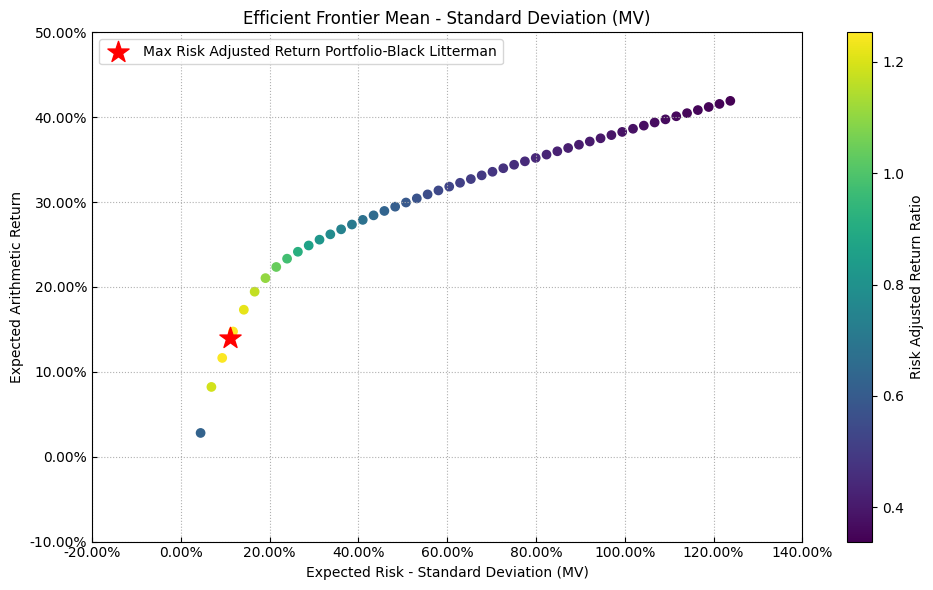

In [ ]:
label = 'Max Risk Adjusted Return Portfolio-Black Litterman' # Title of point
mu = port.mu_bl # Expected returns of Black Litterman model
cov = port.cov_bl # Covariance matrix of Black Litterman model
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier_bl, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w_bl, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

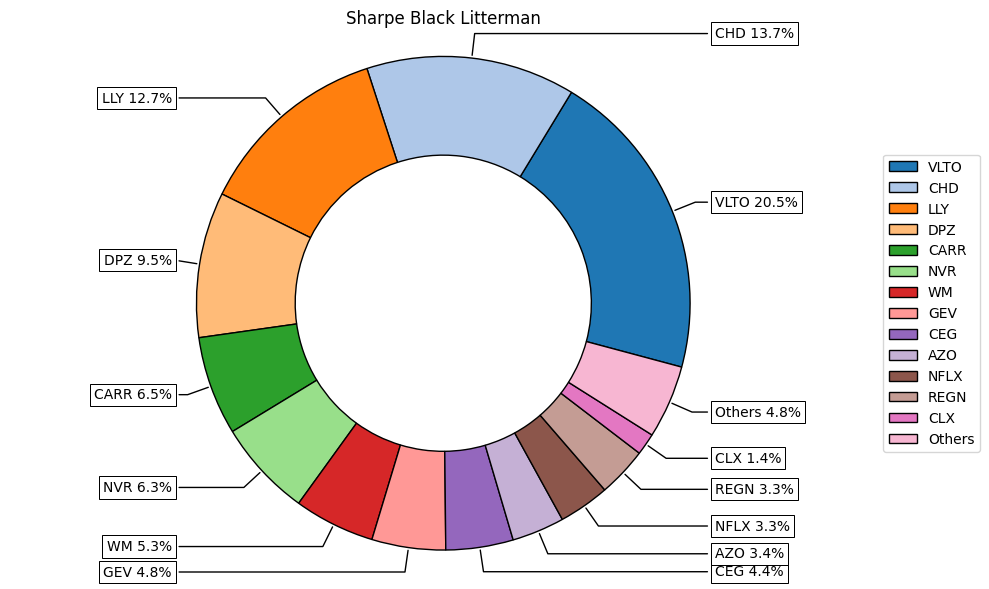

In [ ]:
ax = rp.plot_pie(w=w_bl, title='Sharpe Black Litterman', others=0.05, nrow=25,
                 cmap = "tab20", height=6, width=10, ax=None)

In [ ]:
w_bl.style.format("{:.2%}").background_gradient(cmap='YlGn')

In [ ]:
returns.columns

Index(['A', 'AAL', 'AAPL', 'ABBV', 'ABNB', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI',
       ...
       'WTW', 'WY', 'WYNN', 'XEL', 'XOM', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZTS'],
      dtype='object', name='Symbol', length=503)

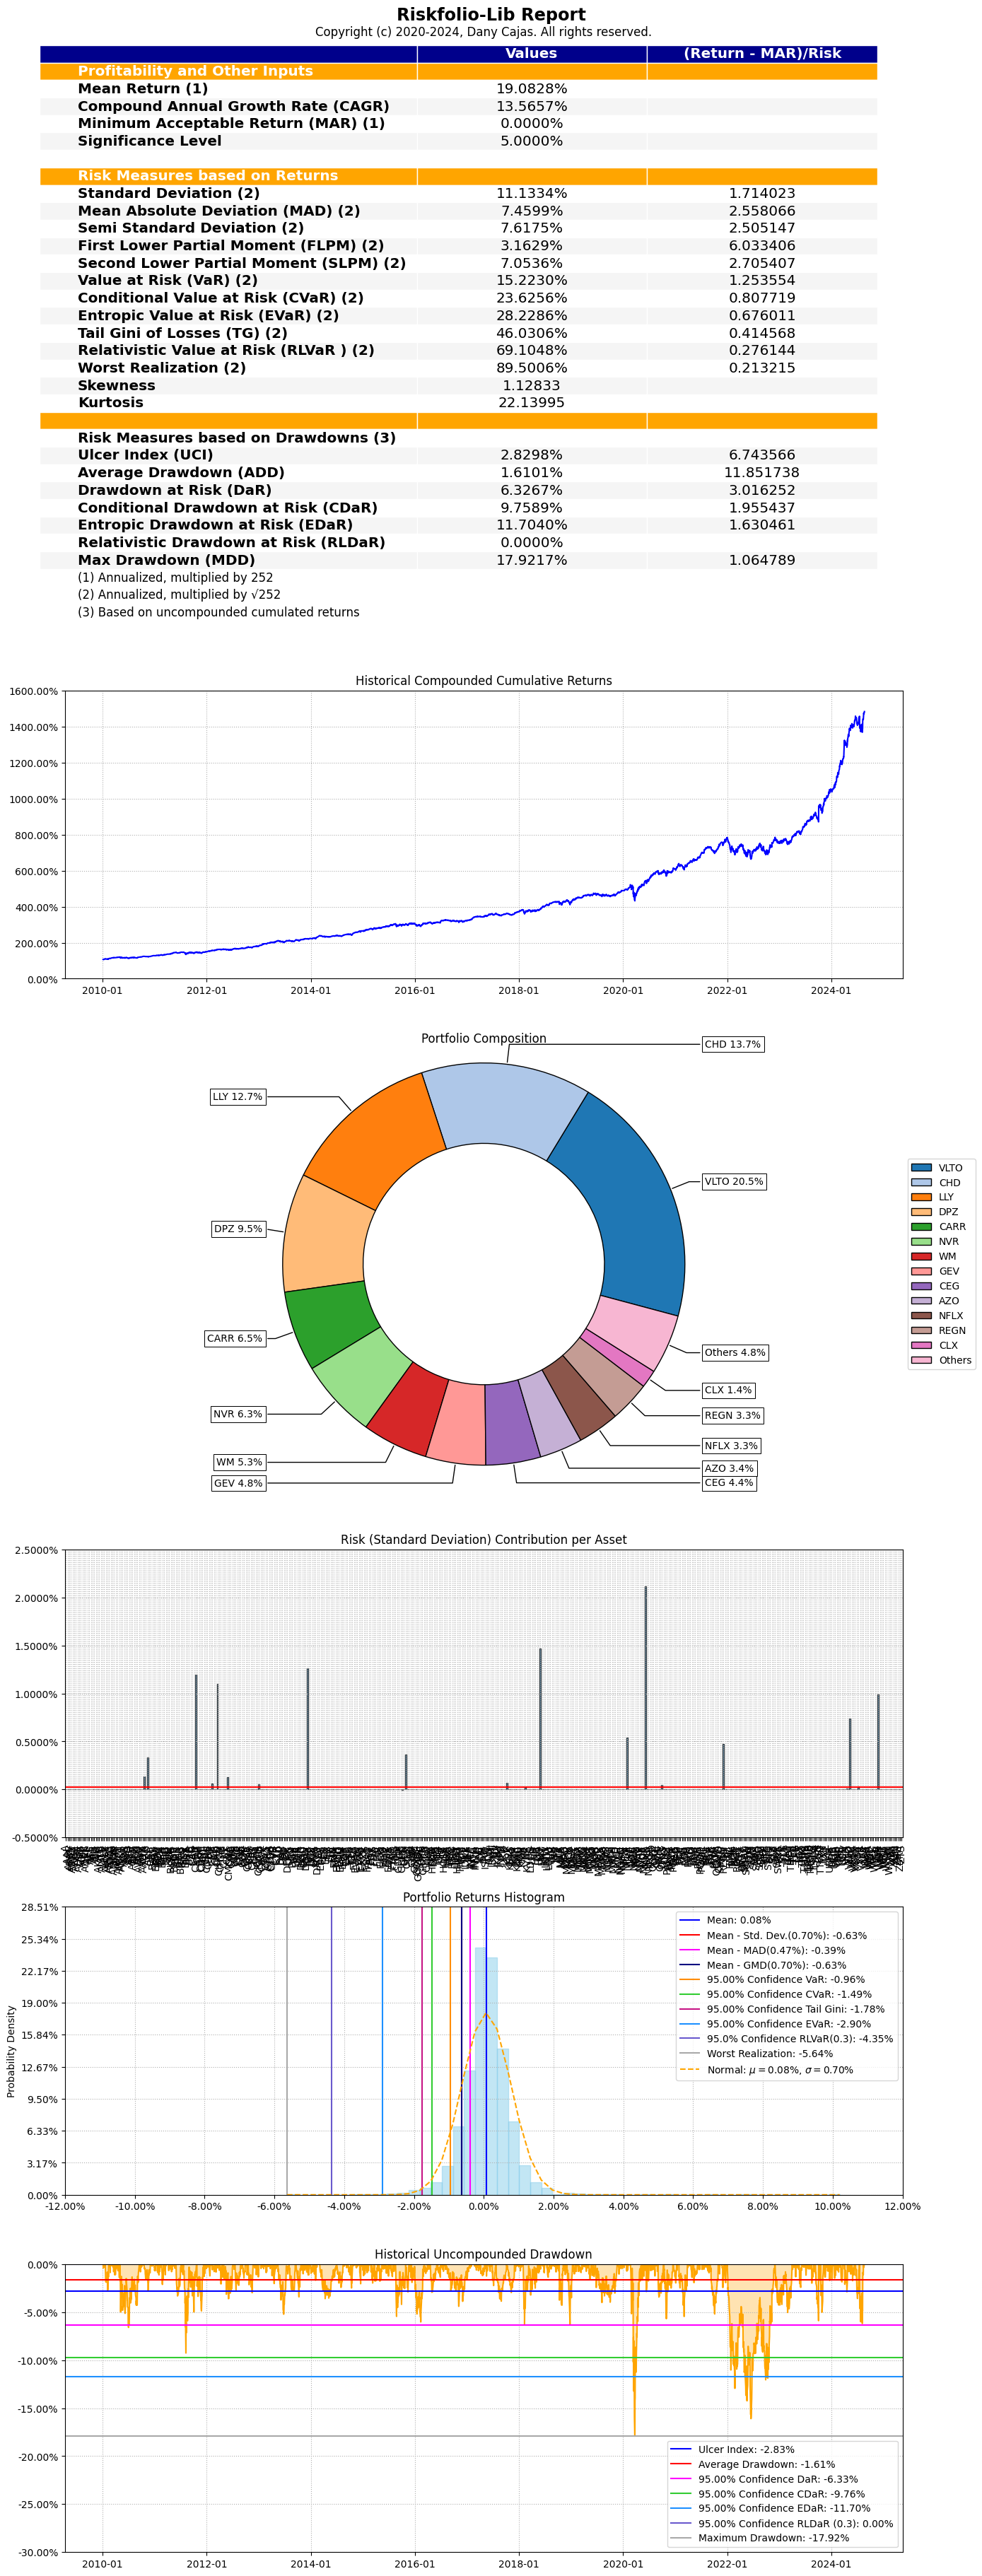

In [ ]:
ax = rp.jupyter_report(returns,
                       w_bl,
                       rm='MV',
                       rf=0,
                       alpha=0.05,
                       height=6,
                       width=14,
                       others=0.05,
                       nrow=25)

<Axes: title={'center': 'Portfolio Composition'}>

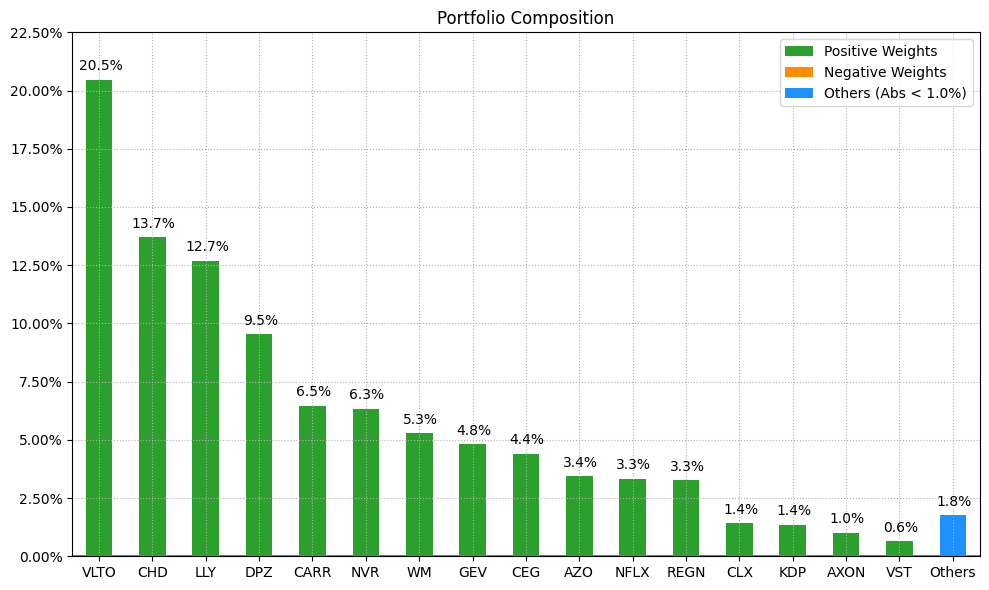

In [ ]:
rp.plot_bar(w=w_bl)

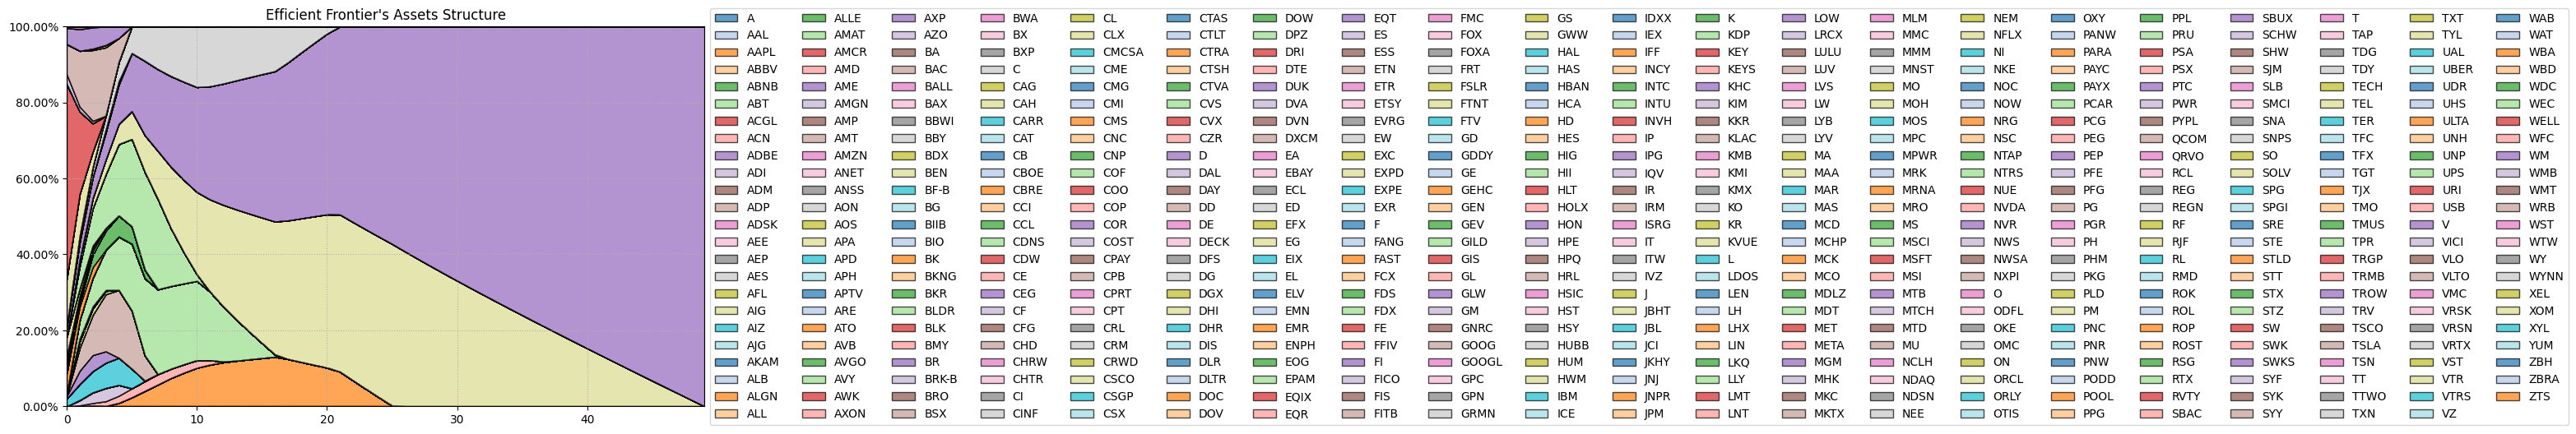

In [ ]:
fig_size = (15, 15)
ax = rp.plot_frontier_area(w_frontier=frontier_bl, cmap="tab20", height=6, width=10, ax=None)

In [ ]:
# Randomly sample 20 tickers
sampled_returns_100 = returns.sample(n=100, axis=1, random_state=42)

plt.figure(figsize=(20, 10))

ax = rp.plot_dendrogram(returns=sampled_returns_100,
                        codependence='spearman',
                        linkage='ward',
                        k=None,
                        max_k=10,
                        leaf_order=True,
                        ax=None)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


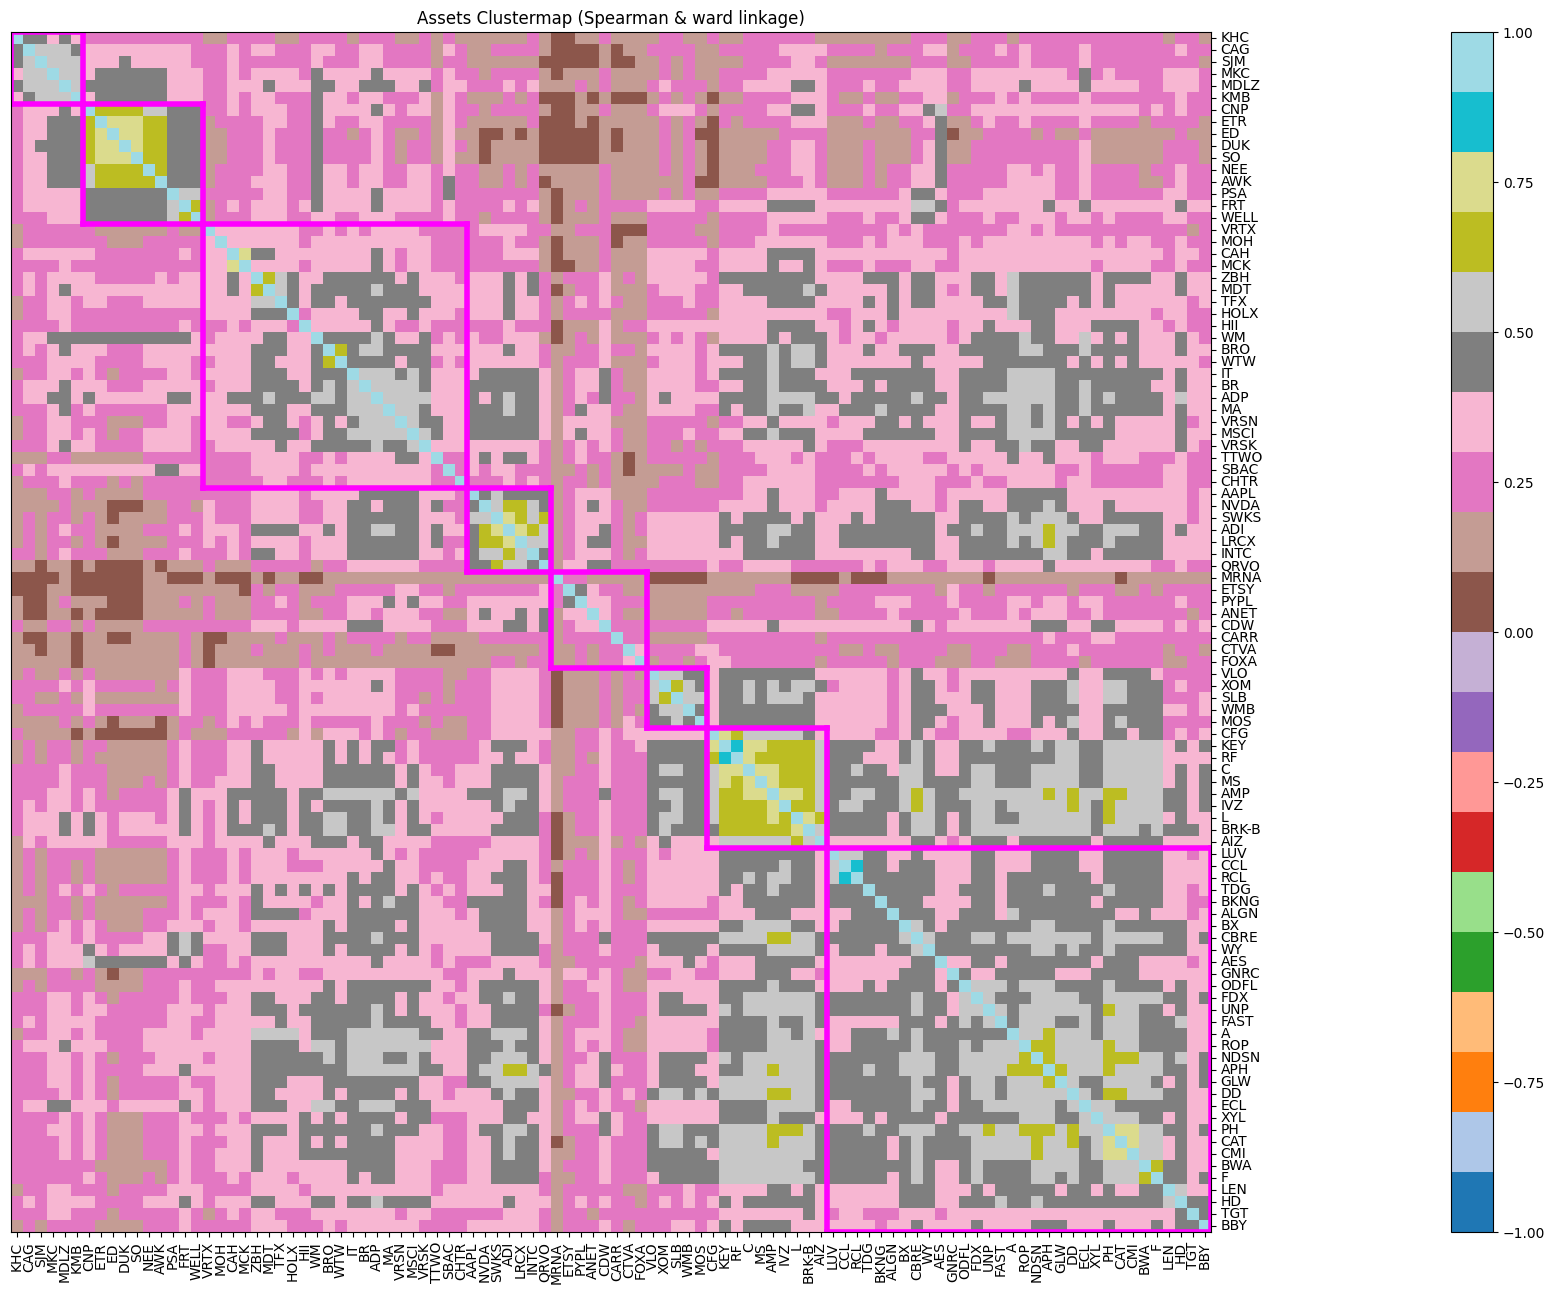

In [ ]:
# Randomly selected sample 100 tickers from the returns DataFrame
plt.figure(figsize=(20, 10))
# Plot clusters using the sampled returns
ax = rp.plot_clusters(
    returns=sampled_returns_100,  # sampled data
    codependence='spearman',  # Type of correlation
    linkage='ward',           # Type of hierarchical clustering
    k=None,                   # Number of clusters (optional)
    max_k=10,                 # Maximum number of clusters (optional)
    leaf_order=True,          # Leaf ordering for better readability
    dendrogram=False,         # Set to True if you want to plot a dendrogram
    ax=None,                  # Plot on current axis
    cmap='tab20'              # Colormap for clusters
)

plt.show()

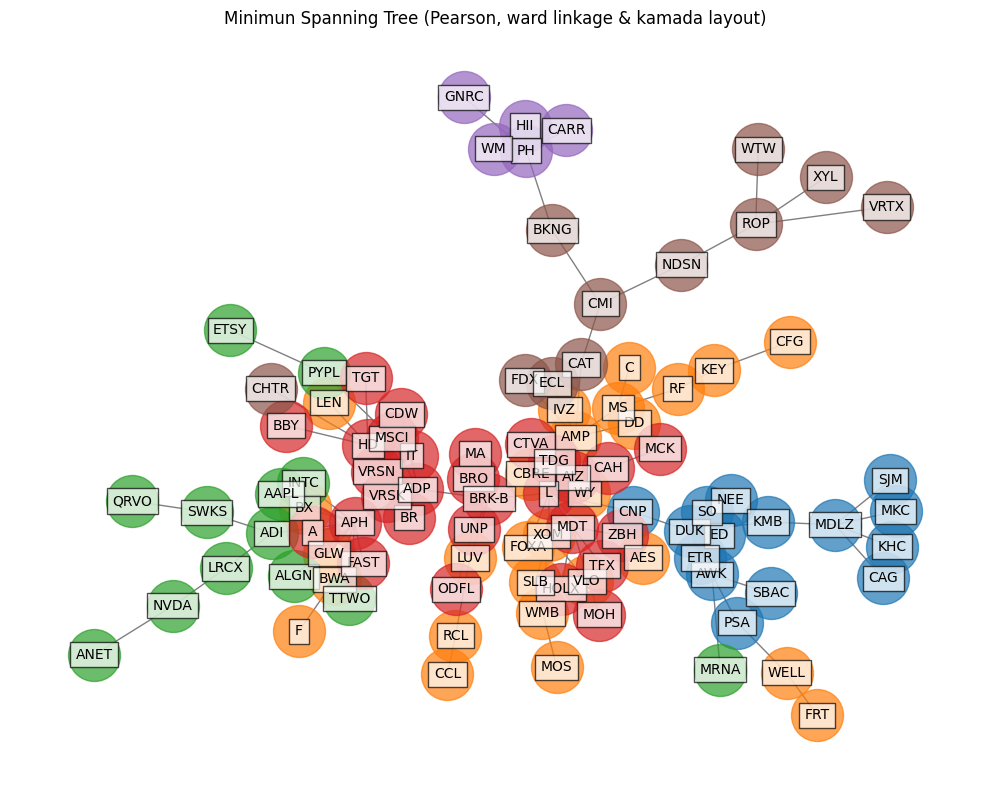

In [ ]:
ax = rp.plot_network(returns=sampled_returns_100,
                     codependence="pearson",
                     linkage="ward",
                     k=None,
                     max_k=10,
                     alpha_tail=0.05,
                     leaf_order=True,
                     kind='kamada',
                     ax=None)

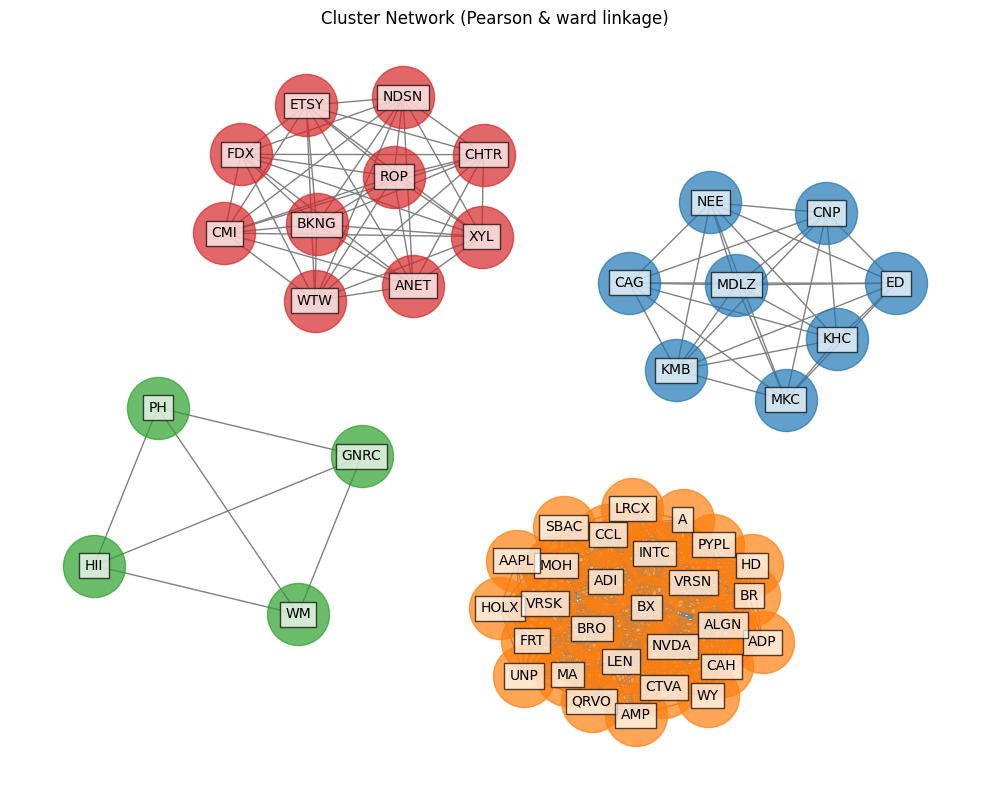

In [ ]:
sampled_returns_50 = returns.sample(n=50, axis=1, random_state=42)
ax = rp.plot_clusters_network(returns=sampled_returns_50,
                              codependence="pearson",
                              linkage="ward",
                              k=None,
                              max_k=10,
                              ax=None)